In [3]:
# Hypothesis Testing

# Set up hypothesis:
    # Null: average income of all employees is 40K$  
    # Alt: less than
    #     More than
    #      not equal to

# select significance level (alpha)
    # 5%- generic, all situations
    #10% - where less accuracy required and constraint of small samples
    #1%- where a great degree of accuracy required 

# select test statistics
    # t-test
    # z-test
    # ANOVA
    # paired t-test
    # independent t-test
    # chi-squared test

# decision boundary
    # based on type of alternate hypothesis and alpha value

# make inferences
    # conclusion based on the p-value derived from the test statistics

In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [5]:
# generate random sample data for population of india
pop_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
print pop_ages1
pop_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
print pop_ages2

pop = np.concatenate((pop_ages1,pop_ages2))
pop.mean()

[48 56 50 ..., 62 49 60]
[31 35 29 ..., 30 28 23]


43.004924000000003

In [6]:
# single sample t-test
stats.ttest_1samp(a=pop, popmean=42.988)
# if the p-value < 0.05, reject the null

Ttest_1sampResult(statistic=0.64012828124008547, pvalue=0.52208979067429584)

In [7]:
# Two sample t-test
np.random.seed(1234)

maths = stats.poisson.rvs(loc=15, mu=25, size=30)
print maths

stat = stats.poisson.rvs(loc=18,mu=29, size=30)
print stat

#NULL: average marks scored by student in math and stats are same
#ALT: average marks scored by student in math and stats are different

[35 39 44 36 38 43 38 40 38 31 49 38 37 47 45 43 39 30 41 37 33 41 37 40 38
 33 44 40 36 39]
[46 56 50 51 49 40 47 47 48 36 52 52 62 44 46 54 44 55 52 43 44 37 44 54 41
 44 38 51 48 43]


In [8]:
subject = np.concatenate((maths,stat))
subject.mean()

43.116666666666667

In [9]:
# two sample ttest
stats.ttest_ind(a=maths,b=stat,equal_var=False)

Ttest_indResult(statistic=-6.0921959828866532, pvalue=1.286403433169436e-07)

In [10]:
#conclusion: since the p-value is less than 0.05 we can reject the null hypothesis that the average of scores
# secured by students in math and stats are same, conclude that they are significantly different.

In [11]:
# two sample dependent ttest
# some people are undergoing some weight reduction program
np.random.seed(1234)

before = stats.norm.rvs(scale=10, loc=90,size=200)
print before

after = before + stats.norm.rvs(scale=5, loc=-1.25,size=200)
print after


[  94.71435164   78.09024305  104.32706968   86.87348104   82.79411267
   98.8716294    98.59588414   83.63476496   90.15696372   67.57315046
  101.50035725   99.91946022   99.53324128   69.7874518    86.65922634
   90.02118365   94.05453412   92.89091941  103.21158192   74.53094447
   87.97353675   83.44030656   91.93421376   95.53438911  103.18151554
   85.30694715   96.75554085   71.82972773   88.1689146   100.58969188
   86.02159772   93.37437654  100.47578573  100.45938256   98.63717292
   88.77908425   91.24712954   86.77205194   98.41674713  113.90960515
   90.76199588   84.3355407    90.36141937   69.25022399   92.477922
   81.02843216   88.63205167   90.18289191   97.55413982   92.15268581
   98.41008795   75.54189923   75.98026718   88.990818     84.51757551
   88.55380492   93.54020332   89.64486975   95.65738306  105.45658805
   80.25763666   89.29655123   93.07968855   87.91501237  100.33800733
   65.99546366  110.30603621   78.57368711   92.11883387   97.04720624
   82.14

In [12]:
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "change_weight":after-before})

In [13]:
weight_df.head(10)

,change_weight,weight_after,weight_before
0,-2.847807,91.866545,94.714352
1,-4.349965,73.740278,78.090243
2,-0.465008,103.862062,104.327070
3,-4.107277,82.766204,86.873481
4,4.038166,86.832279,82.794113
5,-5.207444,93.664185,98.871629
6,-3.873137,94.722747,98.595884
7,-0.890610,82.744155,83.634765
8,8.303797,98.460761,90.156964
9,2.689823,70.262974,67.573150


In [14]:
weight_df.describe()

,change_weight,weight_after,weight_before
count,200.000000,200.000000,200.000000
mean,-0.610619,89.314172,89.924791
std,4.745098,10.521237,9.905585
min,-13.237520,51.242650,54.364833
25%,-3.710245,83.667902,84.078813
50%,-0.588084,90.406930,90.616356
75%,2.222535,95.704593,96.958044
max,12.569220,118.948615,113.909605


In [15]:
#ttest related sample
stats.ttest_rel(before,after)

Ttest_relResult(statistic=1.8198677128639968, pvalue=0.070281672194742378)

In [16]:
before.mean()

89.924790799969202

In [17]:
after.mean()

89.314172237564748

In [18]:
# since the p-value > 0.05 we will not reject the null hypothesis
# NULL: mean before = mean after
# Alt: mean before != mean after
# the weight reduction program is not effective in reducing the weight of people in the sample

In [19]:
# Types of error in statistical hypothesis testing
# Type I error: null hypothesis is true, your test rejects it 
# Type II error: null hypothesis is false, your test accepts it

In [20]:
# Tradeoff between type 1 and type 2 error

In [21]:
plt.figure(figsize=(15,7))

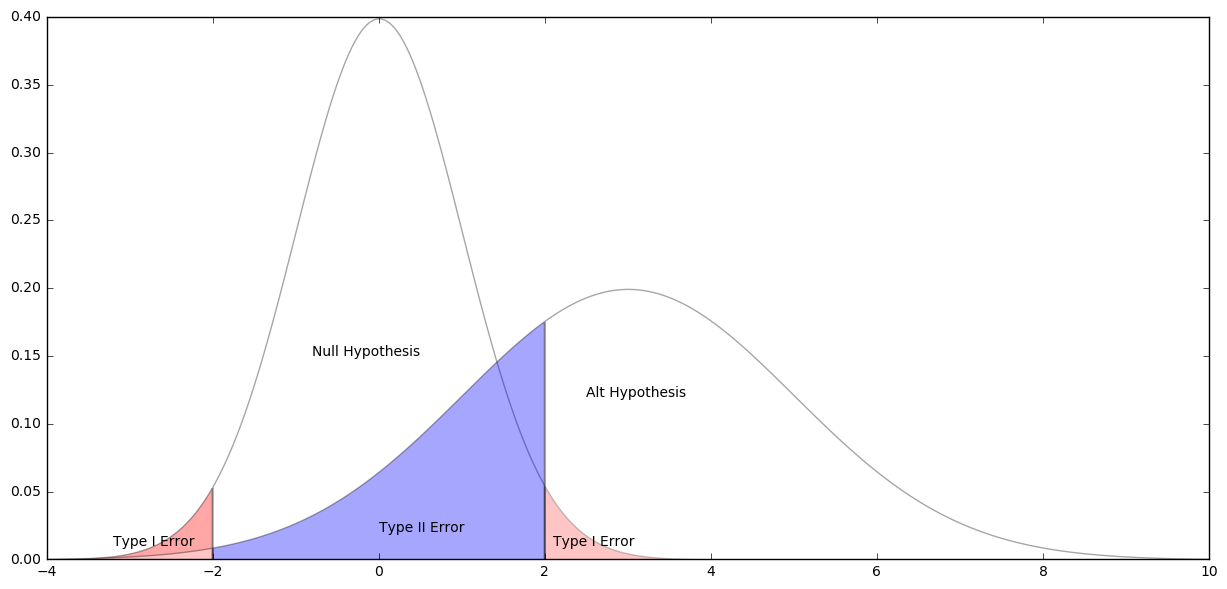

In [22]:
plt.figure(figsize=(15,7))
plt.fill_between(x=np.arange(-4,-2,0.01),
                y1=stats.norm.pdf(np.arange(-4,-2,0.01)),
                facecolor='red',
                alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01),
                y1=stats.norm.pdf(np.arange(-2,2,0.01)),
                facecolor='white',
                alpha=0.35)
plt.fill_between(x=np.arange(2,4,0.01),
                y1=stats.norm.pdf(np.arange(2,4,0.01)),
                facecolor='red',
                alpha=0.35)

plt.fill_between(x=np.arange(-4,-2,0.01),
                y1=stats.norm.pdf(np.arange(-4,-2,0.01),loc=3,scale=2),
                facecolor='white',
                alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01),
                y1=stats.norm.pdf(np.arange(-2,2,0.01),loc=3,scale=2),
                facecolor='blue',
                alpha=0.35)
plt.fill_between(x=np.arange(2,10,0.01),
                y1=stats.norm.pdf(np.arange(2,10,0.01),loc=3,scale=2),
                facecolor='white',
                alpha=0.35)

plt.text(x=-0.8,y=0.15,s='Null Hypothesis')
plt.text(x=2.5,y=0.12,s='Alt Hypothesis')
plt.text(x=2.1,y=0.01,s='Type I Error')
plt.text(x=-3.2,y=0.01,s='Type I Error')
plt.text(x=0,y=0.02,s='Type II Error')

In [23]:
# to compare the means of more than 2 groups we can use ANOVA
np.random.seed(1234)

In [24]:
races = ['asian','black','white','hispanic','others']

In [25]:
voter_race = np.random.choice(a=races,
                             p=[0.05,0.15,0.25,0.05,0.5],
                             size=1000)

In [26]:
voter_race

array(['black', 'others', 'white', 'others', 'others', 'white', 'white',
       'others', 'others', 'others', 'white', 'others', 'others', 'others',
       'white', 'others', 'others', 'asian', 'others', 'others', 'white',
       'others', 'black', 'white', 'others', 'others', 'white', 'others',
       'white', 'others', 'others', 'white', 'others', 'black', 'others',
       'others', 'white', 'others', 'white', 'others', 'black', 'black',
       'asian', 'others', 'others', 'others', 'asian', 'others', 'white',
       'others', 'black', 'others', 'others', 'asian', 'others', 'others',
       'others', 'others', 'others', 'others', 'white', 'others',
       'hispanic', 'black', 'white', 'black', 'hispanic', 'others',
       'black', 'black', 'others', 'others', 'hispanic', 'black', 'white',
       'others', 'white', 'others', 'asian', 'white', 'white', 'others',
       'others', 'others', 'others', 'black', 'others', 'others', 'others',
       'white', 'black', 'others', 'others', 'oth

In [27]:
voter_age = stats.poisson.rvs(loc=18,
                             mu=30,
                             size=1000)

In [28]:
voter_age

array([46, 48, 47, 47, 43, 46, 47, 52, 39, 47, 42, 49, 47, 41, 41, 37, 50,
       56, 58, 48, 44, 48, 43, 47, 58, 41, 45, 54, 49, 45, 52, 52, 45, 65,
       42, 48, 45, 51, 48, 48, 54, 39, 52, 37, 51, 42, 61, 47, 48, 41, 55,
       39, 40, 51, 54, 37, 46, 47, 40, 56, 44, 45, 36, 44, 41, 47, 54, 44,
       47, 55, 42, 53, 48, 51, 42, 54, 49, 47, 47, 42, 50, 40, 42, 48, 50,
       44, 51, 53, 49, 47, 40, 53, 49, 52, 52, 46, 44, 44, 52, 47, 46, 53,
       51, 43, 49, 43, 52, 44, 43, 45, 51, 50, 43, 46, 44, 42, 46, 48, 42,
       55, 57, 44, 44, 41, 53, 52, 46, 46, 47, 47, 39, 50, 41, 45, 49, 37,
       48, 53, 49, 53, 54, 47, 40, 54, 56, 54, 54, 50, 49, 52, 44, 48, 47,
       50, 38, 41, 41, 49, 49, 53, 46, 53, 46, 48, 40, 41, 54, 55, 41, 47,
       46, 52, 52, 49, 49, 54, 41, 44, 49, 39, 43, 44, 56, 47, 52, 56, 47,
       46, 47, 50, 53, 45, 39, 51, 45, 51, 47, 52, 54, 39, 46, 45, 42, 32,
       45, 50, 50, 51, 52, 48, 50, 38, 48, 40, 49, 42, 36, 48, 39, 40, 53,
       45, 53, 41, 45, 48

In [29]:
voter_df = pd.DataFrame({'race':voter_race,'age':voter_age})
groups = voter_df.groupby('race').groups

In [30]:
voter_df.head()

,age,race
0,46,black
1,48,others
2,47,white
3,47,others
4,43,others


In [31]:
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
white = voter_age[groups['white']]
others = voter_age[groups['others']]


In [33]:
# ANOVA
stats.f_oneway(asian,black,hispanic,white,others)

F_onewayResult(statistic=1.5392843178293896, pvalue=0.18862594006262309)

In [34]:
# one way means - one variable "Age"
# One factor means- races


In [35]:
# if the p-value is greater than 0.05, you will fail to reject the null hypothesis
# no further investigation required

In [36]:
# if the p-value is less than 0.05, you will reject the null hypothesis

In [37]:
# to test out which group is different , post-hoc test on the ANOVA results

In [38]:
# TukeyHSD- honest significance difference in the means of the groups

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print pairwise_tukeyhsd(voter_df.age, voter_df.race)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower  upper  reject
------------------------------------------------
 asian    black   -1.2961  -3.6346 1.0425 False 
 asian   hispanic -2.4722  -5.6871 0.7427 False 
 asian    others  -1.6731  -3.7707 0.4245 False 
 asian    white   -1.6368  -3.8592 0.5857 False 
 black   hispanic -1.1762  -3.9847 1.6323 False 
 black    others   -0.377  -1.7741 1.0201 False 
 black    white   -0.3407  -1.9192 1.2378 False 
hispanic  others   0.7991  -1.8121 3.4104 False 
hispanic  white    0.8355  -1.8772 3.5481 False 
 others   white    0.0363  -1.1564 1.2291 False 
------------------------------------------------


# Assignment:
# Read the automobile dataset from UCI library
#1- Is there any difference between mileage per gallon on highway by feul type
#2- Is there any difference between city mileage and highway mileage


In [53]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [54]:
autom=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=None)

In [6]:
autom.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
autom.columns=[    'symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
    'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
    'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']


In [15]:
autom.head(19)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [25]:
autom['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [56]:
#1- Is there any difference between mileage per gallon on highway by feul type
x,p=stats.ttest_ind(a=autom['highway-mpg'][autom['fuel-type']=='gas'],b=autom['highway-mpg'][autom['fuel-type']=='diesel'],
                    equal_var=False)
if p<0.05:
    print 'Reject Null Hypo of Same Means  - Therefore Differnt means'
else:
    print 'Null Hypo Accpeted - Same Means'

Reject Null Hypo of Same Means  - Therefore Differnt means


In [42]:
print autom['highway-mpg'][autom['fuel-type']=='gas'].mean()
print autom['highway-mpg'][autom['fuel-type']=='diesel'].mean()

30.3189189189
34.75


In [41]:
#Assignment 2nd Part

34.75

In [46]:
autom[['city-mpg','highway-mpg']].isnull().sum()

city-mpg       0
highway-mpg    0
dtype: int64

In [57]:
#2- Is there any difference between city mileage and highway mileage
x,p=stats.ttest_rel(a=autom['highway-mpg'],b=autom['city-mpg'])
if p<0.05:
    print 'Reject Null Hypo of Same Means  - Therefore Differnt means'
else:
    print 'Null Hypo Accpeted - Same Means'

Reject Null Hypo of Same Means  - Therefore Differnt means


In [58]:
x,p=stats.ttest_ind(a=autom['highway-mpg'],b=autom['city-mpg'],equal_var=False)
if p<0.05:
    print 'Reject Null Hypo of Same Means  - Therefore Differnt means'
else:
    print 'Null Hypo Accpeted - Same Means'

Reject Null Hypo of Same Means  - Therefore Differnt means


In [52]:
print autom['highway-mpg'].mean()
print autom['city-mpg'].mean()

30.7512195122
25.2195121951


In [ ]:
#For Pradeepta Review
#1- Is there any difference between mileage per gallon on highway by feul type
x,p=stats.ttest_ind(a=autom['highway-mpg'][autom['fuel-type']=='gas'],b=autom['highway-mpg'][autom['fuel-type']=='diesel'],
                    equal_var=False)
#2- Is there any difference between city mileage and highway mileage
x,p=stats.ttest_rel(a=autom['highway-mpg'],b=autom['city-mpg'])
if p<0.05:
    print 'Reject Null Hypo of Same Means  - Therefore Different means'
else:
    print 'Null Hypotheis Accpeted - Same Means'